* Name: Parth Kodnani 
* Course: BUDT704 
* Section: 0502
* Date: 09/22/2021

# Kickstarter Analysis using Arrays and NumPy

1. Kickstarter (https://www.kickstarter.com) has established itself as the leading platform for funding creative ventures. Aspiring entrepreneurs in the arts can initiate fundraising campaigns on Kickstarter to support their projects. 
2. Some projects have been hugely successful, whereas many others have fallen well short of their fundraising objectives. 
3. Each row in the attached file contains a summary of each campaign, including the goal and amount pledged, the state of the project in securing funding (e.g., successful, failed), the category of the project (i.e., type of art), and whether the project was featured via a staff pick or spotlight (i.e., on the Kickstarter home page).

In [55]:
# Importing the necessary libraries

import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Case 1
Load the amount pledged (in U.S. dollars) data across all projects.

#### Steps for Case 1
1. Using the 'usecols' parameter to only include the 'Amount Pledged in USD' column.
2. Skipping the first row because it contains text.

In [8]:
# Loading the data for 'Amount Pledged'
amtPledged = np.loadtxt(r"HW3_kickstarter.csv", usecols = 11, skiprows = 1, delimiter = ',')
print(amtPledged)

[ 321.         857.0681028 4431.12      ...   50.         220.2370882
  155.       ]


## Case 2
Display descriptive statistics that include:
1. Total number of projects
2. Amount pledged (in U.S. dollars): min, max, mean, median, and standard deviation
3. Percentage of projects that earned total pledges of at least $2,500

In [383]:
gAmt = (amtPledged>=2500) # Filtering values greater than and equal to $2500
print("------Descriptive Statistics------\n")

noOfProj = len(amtPledged)
print('The total number of projects: ',  noOfProj, '\n')

print(f'Minimum amount pledged:               \t${np.amin(amtPledged)}')
print(f'Maximum amount pledged:               \t${np.amax(amtPledged)}')
print(f'Average amount pledged:               \t${np.mean(amtPledged):.2f}')
print(f'Median amount pledged:                \t${np.median(amtPledged)}')
print(f'Standard Deviation of amount pledged: \t${np.std(amtPledged):.2f}\n')

valProj = len(np.where(gAmt)[0]) # Adding all the amounts greater than and equal to $2500
perProj = (valProj/noOfProj)*100
print(f'Percentage of projects that earned total pledges of at least $2,500: \t{perProj:.2f}%')

------Descriptive Statistics------

The total number of projects:  4184 

Minimum amount pledged:               	$0.0
Maximum amount pledged:               	$111111.77
Average amount pledged:               	$1242.12
Median amount pledged:                	$90.0
Standard Deviation of amount pledged: 	$5177.93

Percentage of projects that earned total pledges of at least $2,500: 	10.59%


## Case 3
Load the project categories data.

#### Steps for Case 3
1. Using the 'usecols' parameter to only include the 'Project Categories' column.
2. Skipping the first row because it contains column header.
3. Using 'dtype' as 'str' because data contains characters.

In [25]:
projCategories = np.loadtxt(r"HW3_kickstarter.csv", dtype = 'str', usecols = 12, skiprows = 1, delimiter = ',')
print(projCategories)

['Conceptual Art' 'Conceptual Art' 'Conceptual Art' ... 'Painting'
 'Painting' 'Painting']


## Case 4
1. Determine the frequency of each category and the proportion (percentage) of observations for each category. 
2. Display a bar chart showing a title, the categories, and percentages, properly labeled and formatted.

#### Steps for Case 4
1. Using 'unique()' function to return the unique values in the data.
2. Using 'return_counts()' parameter to return the count of values corresponding to that particular category.
3. Calculating the proportion of every category in the data.
4. Visualizing this proportion using 'plt.bar()' function.

In [301]:
cat, count = np.unique(projCategories, return_counts = True) # Returns unique categories and their respective counts
print(f'Project Categories:      {cat}')
print(f'Frequency of Categories: {count}\n')

proportion = []
for i in count:
    proportion.append((i/noOfProj)*100) # Calculating proportion and appending to the list

roundProportion = [round(num, 2) for num in proportion]
    
print(f'Proportion of each Category (percentage): {roundProportion}')

Project Categories:      ['Ceramics' 'Conceptual Art' 'Digital Art' 'Illustration' 'Painting']
Frequency of Categories: [ 204  879 1054  461 1586]

Proportion of each Category (percentage): [4.88, 21.01, 25.19, 11.02, 37.91]


<BarContainer object of 5 artists>


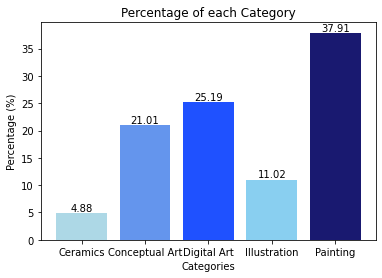

In [303]:
plot = plt.bar(cat, height = roundProportion, color = ['#ADD8E6', '#6495ED', '#1F51FF', '#89CFF0', '#191970']) # Adding color to every bar to distinguish from each other
plt.title('Percentage of each Category')
plt.xlabel('Categories')
plt.ylabel('Percentage (%)')
print(plot)
for p in plot: # Looping through bars to add value labels
   height = p.get_height()
   plt.annotate(
       '{}'.format(height),
       xy = (p.get_x() + p.get_width() / 2, height),
       xytext = (0, 0),
       textcoords = "offset points",
       ha = 'center', va = 'bottom')

## Case 5
Identify two inferences you can make about the various categories. 

#### Inferences
1. Painting projects have the highest proportion, i.e. 37.91%, whereas Ceramics projects have the least, i.e. 4.88% out of all the different types of creative ventures. 
2. The top 3 categories, i.e. Painting, Conceptual Art and Digital Art Projects, have around 84% of the total projects. 

## Case 6
Load the project states data.

#### Steps for Case 6
1. Using the 'usecols' parameter to only include the 'Project States' column.
2. Skipping the first row because it contains column header.
3. Using 'dtype' as 'str' because data contains characters.

In [126]:
projStates = np.loadtxt(r"HW3_kickstarter.csv", dtype = 'str', usecols = 4, skiprows = 1, delimiter = ',')
print(projStates)

['successful' 'successful' 'successful' ... 'failed' 'failed' 'failed']


## Case 7
1. For each project category, calculate the proportion (percentage) of projects that were successful. 
2. Display a bar chart showing a title, the categories, and their success percentages, properly labeled and formatted. 
3. Which project category was the least and most successful (on average)?

#### Steps for Case 7
1. Initializing empty lists for storing the number of successful projects.
2. Adding successful projects to these empty lists for their respective categories.
3. Calculating success percentage of every category.
4. Visulaizing a bar chart to plot these percentages.
5. Making inferences about this visualization.

In [373]:
# Initializing empty lists to store successful projects
cerSuc = []
conSuc = []
digSuc = []
illSuc = []
panSuc = []

# Adding successful projects to their respective categories
for i in range(len(projCategories)):
    if projCategories[i] == 'Ceramics':
        if projStates[i] == 'successful':
            cerSuc.append(projStates[i])

for i in range(len(projCategories)):
    if projCategories[i] == 'Conceptual Art':
        if projStates[i] == 'successful':
            conSuc.append(projStates[i])

for i in range(len(projCategories)):
    if projCategories[i] == 'Digital Art':
        if projStates[i] == 'successful':
            digSuc.append(projStates[i])

for i in range(len(projCategories)):
    if projCategories[i] == 'Illustration':
        if projStates[i] == 'successful':
            illSuc.append(projStates[i])

for i in range(len(projCategories)):
    if projCategories[i] == 'Painting':
        if projStates[i] == 'successful':
            panSuc.append(projStates[i])

# Finding percentage for every categories' successful projects
cerPer = round((len(cerSuc)/count[0]*100),2)
conPer = round((len(conSuc)/count[1]*100),2)
digPer = round((len(digSuc)/count[2]*100),2)
illPer = round((len(illSuc)/count[3]*100),2)
panPer = round((len(panSuc)/count[4]*100),2)

proportionSuc = [cerPer, conPer, digPer, illPer, panPer] # Making a list of percentages of successful projects of every category
      
print(f'Proportion of Successful Ceramics:       {cerPer}%')
print(f'Proportion of Successful Conceptual Art: {conPer}%')
print(f'Proportion of Successful Digital Art:    {digPer}%')
print(f'Proportion of Successful Illustration:   {illPer}%')
print(f'Proportion of Successful Painting:       {panPer}%')

Proportion of Successful Ceramics:       41.18%
Proportion of Successful Conceptual Art: 36.63%
Proportion of Successful Digital Art:    27.13%
Proportion of Successful Illustration:   0.0%
Proportion of Successful Painting:       0.0%


<BarContainer object of 5 artists>


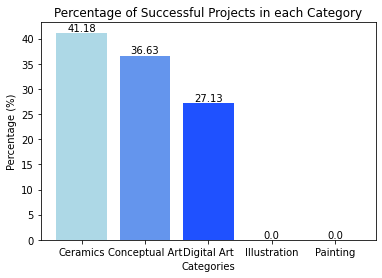

In [300]:
plotSuc = plt.bar(cat, height = proportionSuc, color = ['#ADD8E6', '#6495ED', '#1F51FF'])
plt.title('Percentage of Successful Projects in each Category')
plt.xlabel('Categories')
plt.ylabel('Percentage (%)')
print(plotSuc)
for p in plotSuc: # Looping through bars to add value labels
   height = p.get_height()
   plt.annotate(
       '{}'.format(height),
       xy = (p.get_x() + p.get_width() / 2, height),
       xytext = (0, 0),
       textcoords = "offset points",
       ha = 'center', va = 'bottom')

#### Inferences
1. Ceramics category had the most successful projects with a percentage of 41.18%.
2. Illustration and Painting categories have 0 successful projects. 

## Case 8
Load the staff pick and spotlight data.


#### Steps for Case 8
1. Using the 'usecols' parameter to only include the 'Staff Pick' and 'Spotlight' column.
2. Skipping the first row because it contains column header.
3. Using 'dtype' as 'str' because data contains characters.

In [154]:
staffPick = np.loadtxt(r"HW3_kickstarter.csv", dtype = 'str', usecols = 8, skiprows = 1, delimiter = ',')
spotlight = np.loadtxt(r"HW3_kickstarter.csv", dtype = 'str', usecols = 13, skiprows = 1, delimiter = ',')
print(staffPick)
print(spotlight)

['FALSE' 'FALSE' 'FALSE' ... 'FALSE' 'FALSE' 'FALSE']
['TRUE' 'TRUE' 'TRUE' ... 'FALSE' 'FALSE' 'FALSE']


## Case 9
1. Determine the total number of projects identified as staff picks and the total number of projects identified as spotlight projects.
2. For each of these two project classifications, what was the success rate (percentage) of each?

#### Steps for Case 9
1. Finding the total number of projects for the 'Staff Pick' and 'Spotlight' feature.
2. Adding the successful projects to their respective categories.
3. Finding the percentage of successful projects.

In [269]:
# Initializing empty lists to store 'Staff Pick' and 'Spotlight' projects
staffPickT = []
spotlightT = []

# Appending projects to their respective categories
for i in range(len(staffPick)):
    if staffPick[i] == 'TRUE':
        staffPickT.append(i)        
for i in range(len(spotlight)):
    if spotlight[i] == 'TRUE':
        spotlightT.append(i)
        
print(f'Total Number of Projects identified as Staff Picks: {len(staffPickT)}')
print(f'Total Number of Projects identified as Spotlight:   {len(spotlightT)}')

Total Number of Projects identified as Staff Picks: 224
Total Number of Projects identified as Spotlight:   692


In [375]:
# Initializing empty lists to store 'Staff Pick' and 'Spotlight' projects which were successful in receiving funding
staffPickSuc = []
spotlightSuc = []

# Appending projects to their respective categories
for i in range(len(staffPick)):
    if staffPick[i] == 'TRUE':
        if projStates[i] == 'successful':
            staffPickSuc.append(staffPick[i])
        
for i in range(len(spotlight)):
    if spotlight[i] == 'TRUE':
        if projStates[i] == 'successful':
            spotlightSuc.append(spotlight[i])

# Finding percentage of successful projects for respective feature
staffPickPer = len(staffPickSuc)/len(staffPickT)*100
spotlightPer = len(spotlightSuc)/len(spotlightT)*100

print(f'Number of Projects identified as Staff Picks which were successful: {len(staffPickSuc)}')
print(f'Number of Projects identified as Spotlight which were successful:   {len(spotlightSuc)}')

Number of Projects identified as Staff Picks which were successful: 163
Number of Projects identified as Spotlight which were successful:   692


## Case 10
1. Which feature (staff pick or spotlight) is associated with a higher percentage of successful projects?
2. What inference can you make from the data to explain why one of the features has a higher percentage of successful projects?

#### Steps for Case 10
1. Checking to see which feature has higher number of successful projects.

In [289]:
print(f'Percentage of successful projects of Staff Pick Feature: {staffPickPer:.2f}%')
print(f'Percentage of successful projects of Spotlight Feature:  {spotlightPer:.2f}%\n')

# Comparing each feature's percentage to check which is higher 
if staffPickPer > spotlightPer:
    print(f'The Staff Pick feature has a higher percentage of successful projects.')
else:
    print(f'The Spotlight feature has a higher percentage of successful projects.')

Percentage of successful projects of Staff Pick Feature: 72.77%
Percentage of successful projects of Spotlight Feature:  100.00%

The Spotlight feature has a higher percentage of successful projects.


#### Inferences
Spotlight Feature has 100% successful rate because the successful projects from all categories have the spotlight feature.

## Case 11
Using data already loaded and/or loading more data of your choice, create a visualization of your choice, and make at least one inference from your analysis.

#### Steps for Case 11
1. Loading the 'Goal' and 'Pledged' columns.
2. Calculating Descriptive Statistics for both the columns.
3. Creating two empty lists to store which amount is greater.
4. Counting the elements in the two lists and calculating their percentages.
5. Visualizing these percentages on bar graph.
6. Checking which categories had more amount pledged than their goal amount.
7. Visualizing these numbers on bar graph.

In [339]:
goal = np.loadtxt(r"HW3_kickstarter.csv", usecols = 2, skiprows = 1, delimiter = ',')
pledged = np.loadtxt(r"HW3_kickstarter.csv", usecols = 3, skiprows = 1, delimiter = ',')
true = []
false = []

print("Descriptive Statistics of Goal Amount and Amount Pledged: ")
print(f'Minimum goal:              ${np.amin(goal):.2f}')
print(f'Minimum amount pledged:    ${np.amin(pledged):.2f}')
print(f'Maximum goal:              ${np.amax(goal):.2f}')
print(f'Maximum amount pledged:    ${np.amax(pledged):.2f}')
print(f'Total Goal Amount:         ${np.sum(goal):.2f}')
print(f'Total Pledged Amount:      ${np.sum(pledged):.2f}\n')

Descriptive Statistics of Goal Amount and Amount Pledged: 
Minimum goal:              $0.01
Minimum amount pledged:    $0.00
Maximum goal:              $100000000.00
Maximum amount pledged:    $240351.91
Total Goal Amount:         $182584875.86
Total Pledged Amount:      $5601211.12



In [340]:
for i in pledged > goal: # Checking if amount pledged is greater or goal is greater
    if i == True:
        true.append(i)
    elif i == False:
        false.append(i)

truePer = round((len(true)/noOfProj*100), 2)
falsePer = round((len(false)/noOfProj*100), 2)
trueFalseL = [truePer, falsePer]

tfCategory = ['Goal Amount Pledged', 'Goal Amount not Pledged']

print(f'Number of projects where Amount Pledged was greater than Goal Amount:         {len(true)}')
print(f'Number of projects where Amount Pledged was not greater than Goal Amount:     {len(false)}')
print(f'Percentage of projects where Amount Pledged was greater than Goal Amount:     {truePer:.2f}%')
print(f'Percentage of projects where Amount Pledged was not greater than Goal Amount: {falsePer:.2f}%')

Number of projects where Amount Pledged was greater than Goal Amount:         675
Number of projects where Amount Pledged was not greater than Goal Amount:     3509
Percentage of projects where Amount Pledged was greater than Goal Amount:     16.13%
Percentage of projects where Amount Pledged was not greater than Goal Amount: 83.87%


<BarContainer object of 2 artists>


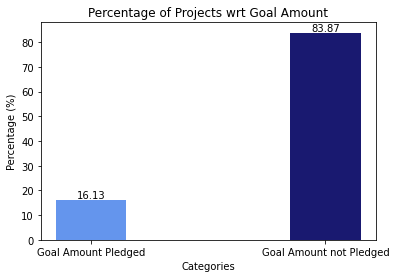

In [371]:
trueFalseBar = plt.bar(tfCategory, height = trueFalseL, color = ['#6495ED', '#191970'], width = 0.3)
plt.title('Percentage of Projects wrt Goal Amount')
plt.xlabel('Categories')
plt.ylabel('Percentage (%)')
print(trueFalseBar)

for p in trueFalseBar: # Looping through bars to add value labels
   height = p.get_height()
   plt.annotate(
       '{}'.format(height),
       xy = (p.get_x() + p.get_width() / 2, height),
       xytext = (0, 0),
       textcoords = "offset points",
       ha = 'center', va = 'bottom')

In [360]:
# Initializing empty lists to store 'Staff Pick' and 'Spotlight' projects which were successful in receiving funding
tCer = []
tCon = []
tDig = []
tIll = []
tPan = []

# Appending projects to their respective categories
for i in range(len(true)):
    if projCategories[i] == 'Ceramics':
        tCer.append(true[i])
    if projCategories[i] == 'Conceptual Art':
        tCon.append(true[i])
    if projCategories[i] == 'Digital Art':
        tDig.append(true[i])
    if projCategories[i] == 'Illustration':
        tIll.append(true[i])
    if projCategories[i] == 'Painting':
        tPan.append(true[i])

tCatList = [len(tCer), len(tCon), len(tDig), len(tIll), len(tPan)]

print(f'Number of Projects where Amount Pledged is greater than Goal Amount and Category is Ceramic:        {len(tCer)}')
print(f'Number of Projects where Amount Pledged is greater than Goal Amount and Category is Conceptual Art: {len(tCon)}')
print(f'Number of Projects where Amount Pledged is greater than Goal Amount and Category is Digital Art:    {len(tDig)}')
print(f'Number of Projects where Amount Pledged is greater than Goal Amount and Category is Illustration:   {len(tIll)}')
print(f'Number of Projects where Amount Pledged is greater than Goal Amount and Category is Painting:       {len(tPan)}')

Number of Projects where Amount Pledged is greater than Goal Amount and Category is Ceramic:        0
Number of Projects where Amount Pledged is greater than Goal Amount and Category is Conceptual Art: 100
Number of Projects where Amount Pledged is greater than Goal Amount and Category is Digital Art:    575
Number of Projects where Amount Pledged is greater than Goal Amount and Category is Illustration:   0
Number of Projects where Amount Pledged is greater than Goal Amount and Category is Painting:       0


<BarContainer object of 2 artists>


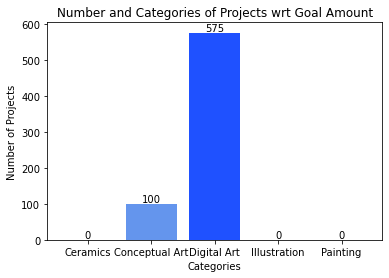

In [381]:
tCatBar = plt.bar(cat, height = tCatList, color = ['#1F51FF', '#6495ED'])
plt.title('Number and Categories of Projects wrt Goal Amount')
plt.xlabel('Categories')
plt.ylabel('Number of Projects')
print(trueFalseBar)

for p in tCatBar: # Looping through bars to add value labels
   height = p.get_height()
   plt.annotate(
       '{}'.format(height),
       xy = (p.get_x() + p.get_width() / 2, height),
       xytext = (0, 0),
       textcoords = "offset points",
       ha = 'center', va = 'bottom')

#### Inferences
1. Out of all the projects, only 675 projects, i.e. 16.13% projects got more amount than their goal pledged. The rest 3509 projects did not receive the amount they expected.
2. These 675 projects have also been distributed only through the 'Conceptual Art' and 'Digital Art' Categories. No other categories received funding greater than their goal amount. 
3. We can infer that Conceptual Art and Digital Art Categories are more in demand and people will pay more for projects of these categories.

"I pledge on my honor that I have not given nor received any unauthorized assistance on this assignment."
#### --Parth Kodnani